In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [5]:
# make suare images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape: ", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# Build the model
model = keras.Sequential(
[
      tf.keras.Input(shape=input_shape),
      tf.keras.layers.Conv2D(kernel_size=3, filters=12, activation='relu'),
      tf.keras.layers.Conv2D(kernel_size=6, filters=24, strides=2, activation='relu'),
      tf.keras.layers.Conv2D(kernel_size=6, filters=32, strides=2, activation='relu'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 12)        120       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 24)        10392     
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          27680     
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 10)                2890      
                                                                 
Total params: 41,082
Trainable params: 41,082
Non-trainable params: 0
_________________________________________________________________


2022-01-28 07:53:42.656393: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
batch_size = 128
epochs = 30

model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
422/422 [==============================] - 17s 40ms/step - loss: 0.2954 - accuracy: 0.9141 - val_loss: 0.0873 - val_accuracy: 0.9743
Epoch 2/30
422/422 [==============================] - 18s 42ms/step - loss: 0.0770 - accuracy: 0.9767 - val_loss: 0.0657 - val_accuracy: 0.9830
Epoch 3/30
422/422 [==============================] - 29s 70ms/step - loss: 0.0539 - accuracy: 0.9831 - val_loss: 0.0536 - val_accuracy: 0.9855
Epoch 4/30
422/422 [==============================] - 21s 51ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0460 - val_accuracy: 0.9872
Epoch 5/30
422/422 [==============================] - 19s 44ms/step - loss: 0.0353 - accuracy: 0.9888 - val_loss: 0.0478 - val_accuracy: 0.9857
Epoch 6/30
422/422 [==============================] - 20s 47ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0440 - val_accuracy: 0.9887
Epoch 7/30
422/422 [==============================] - 19s 45ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.0455 - val_accuracy:

In [9]:
# Evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.04734629765152931
Test accuracy:  0.9911999702453613


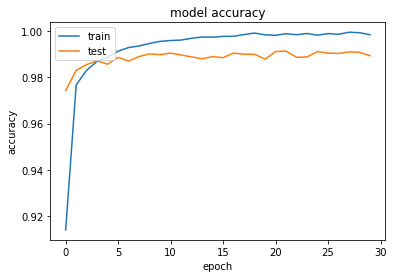

In [10]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

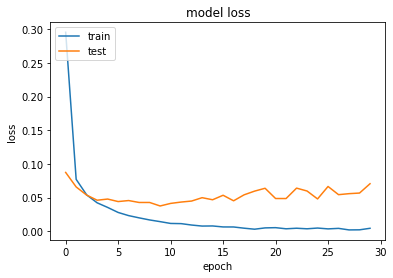

In [11]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
a_val_img = x_test[0]

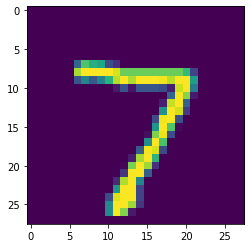

In [13]:
plt.imshow(a_val_img)

In [14]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [15]:
np.shape(a_val_img)

(28, 28, 1)

In [16]:
np.shape(np.array([a_val_img,]))

(1, 28, 28, 1)

In [17]:
model.predict(np.array([a_val_img]))

array([[1.1773768e-21, 9.4355975e-19, 1.9853956e-14, 3.2595419e-16,
        6.6482707e-28, 1.7441588e-19, 6.9608934e-37, 1.0000000e+00,
        1.4679344e-18, 6.7851879e-14]], dtype=float32)

In [18]:
# save the model to file
model.save('./Data/conv_flatten_softmax_model.h5')